In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('drive/My Drive/Colab Notebooks/dataset')

In [1]:
import pandas as pd
df=pd.read_csv('https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv')
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [2]:
df=df.rename(columns={'Id number':'ID','Type of glass':'Glass_Class'})

In [3]:
df.Glass_Class.unique()

array([1, 2, 3, 5, 6, 7])

In [4]:
df.columns

Index(['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Glass_Class'],
      dtype='object')

In [20]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


# EDA

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.25234
Feature: 2, Score: 0.36449
Feature: 3, Score: 0.14673
Feature: 4, Score: 0.25607
Feature: 5, Score: 0.06168
Feature: 6, Score: 0.41402
Feature: 7, Score: 0.01963
Feature: 8, Score: 0.01869


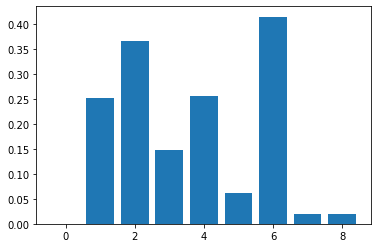

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
X=df.iloc[:,1:10]
y=df['Glass_Class']
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X,y)
result=permutation_importance(model,X,y,scoring='accuracy')

importance=result.importances_mean

for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' %(i,v))


plt.bar([x for x in range(len(importance))],importance)

plt.show()


In [ ]:
import seaborn as sns
sns.swarmplot(x='Na',y='RI',data=df,hue='Glass_Class')

In [21]:
X=df.iloc[:,2:8]
y=df['Glass_Class']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
#data = pd.read_csv('ushape.csv')
x = df[[ 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca']].values
y = df['Glass_Class']
for k in [1,2,3,4,5,6,7,8,9,10,20,40,80]:
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(x,y)
  print("K value : ", k, " train score : ", clf.score(x,y) , " test score : ", cross_val_score(clf,x,y,cv = 10, scoring = 'accuracy').mean())

K value :  1  train score :  1.0  test score :  0.6645021645021645
K value :  2  train score :  0.8551401869158879  test score :  0.6413419913419913
K value :  3  train score :  0.8598130841121495  test score :  0.6456709956709957
K value :  4  train score :  0.7990654205607477  test score :  0.6456709956709956
K value :  5  train score :  0.7850467289719626  test score :  0.640909090909091
K value :  6  train score :  0.7570093457943925  test score :  0.6411255411255412
K value :  7  train score :  0.7383177570093458  test score :  0.6316017316017317
K value :  8  train score :  0.7009345794392523  test score :  0.6318181818181818
K value :  9  train score :  0.7102803738317757  test score :  0.6038961038961038
K value :  10  train score :  0.705607476635514  test score :  0.6041125541125542
K value :  20  train score :  0.6635514018691588  test score :  0.6372294372294374
K value :  40  train score :  0.6121495327102804  test score :  0.5854978354978353
K value :  80  train score :  

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
y_pred=knn.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score
result=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[ 5  3  1  0  0  0]
 [ 7 10  1  1  0  0]
 [ 3  1  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  1]
 [ 0  0  0  0  0  6]]


In [28]:
result1=classification_report(y_test,y_pred)
print(result1)

              precision    recall  f1-score   support

           1       0.33      0.56      0.42         9
           2       0.71      0.53      0.61        19
           3       0.33      0.20      0.25         5
           5       0.67      1.00      0.80         2
           6       1.00      0.50      0.67         2
           7       0.86      1.00      0.92         6

    accuracy                           0.58        43
   macro avg       0.65      0.63      0.61        43
weighted avg       0.62      0.58      0.58        43



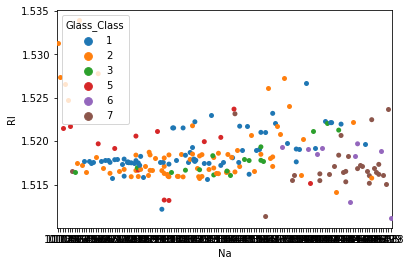

In [17]:
import seaborn as sns
sns.swarmplot(x='Na',y='RI',data=df,hue='Glass_Class')